#   :: Naive Bayes Classifier ::


# What is a classifier?
A classifier is a machine learning model that is used to discriminate different objects based on certain features.


# Principle of Naive Bayes Classifier:
A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task.It is mainly based on Bayes theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature

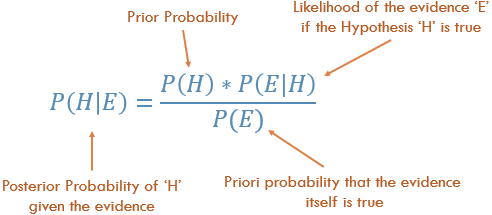

# About Dataset:
Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

# Our aim:
The dataset is imported from the UCI website into a data frame where will attempt to determine the accuracy of the classification of banknotes. 

# Impementation of Naive Bayes Classifier on 'Bank Note' data set

In [17]:
import random
import math
import numpy as np
import pandas as pd
import csv
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv('BankNote_Authentication.csv')

In [19]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [20]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


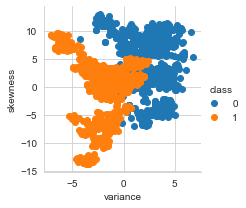

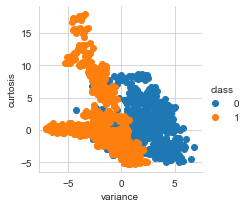

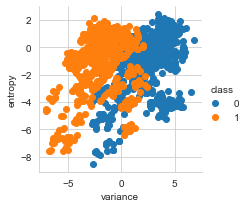

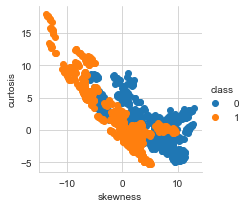

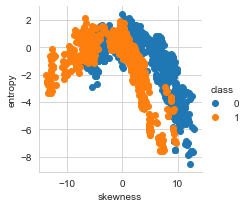

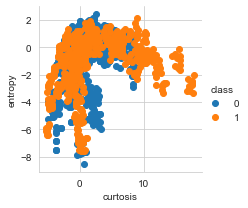

In [21]:
#Visualising Data set


sns.set_style('whitegrid');
sns.FacetGrid(data, hue='class', height = 3) \
   .map(plt.scatter, 'variance','skewness') \
   .add_legend()
sns.set_style('whitegrid');
sns.FacetGrid(data, hue='class', height = 3) \
   .map(plt.scatter, 'variance','curtosis') \
   .add_legend()
sns.set_style('whitegrid');
sns.FacetGrid(data, hue='class', height = 3) \
   .map(plt.scatter, 'variance','entropy') \
   .add_legend()
sns.set_style('whitegrid');
sns.FacetGrid(data, hue='class', height = 3) \
   .map(plt.scatter, 'skewness','curtosis') \
   .add_legend()
sns.set_style('whitegrid');
sns.FacetGrid(data, hue='class', height = 3) \
   .map(plt.scatter, 'skewness','entropy') \
   .add_legend()
sns.set_style('whitegrid');
sns.FacetGrid(data, hue='class', height = 3) \
   .map(plt.scatter, 'curtosis','entropy') \
   .add_legend()

In [22]:
#load data from file

def loadCsv(filename):
    lines = csv.reader(open(filename, "r"))
    dataset = list(lines)
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset

#split data into train and test
def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]

#Separarting each class:
def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

#compute mean of a vector
def mean(numbers):
    return sum(numbers)/float(len(numbers))

#computed std dev of a vector
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

#this will compute the mean and standard derivation of each attribute.
def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

#this will compute the mean and standard deriation of each class separately
# i.e for 0 class and 1 class separately
def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries

#computing probability using a Gaussian distribution
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

#compute P(x|C)
def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities

#Assigning the class based on high probability value
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

#predict class label for a test dataset
def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

#compute accuracy of predictions for the test dataset
def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            print(testSet[i][-1],'=',predictions[i])
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [28]:
#Calling the functions 
filename = 'BankNote_Authentication1.csv'
splitRatio = 0.80
dataset = loadCsv(filename)
trainingSet, testSet = splitDataset(dataset, splitRatio)
summaries = summarizeByClass(trainingSet)
predictions = getPredictions(summaries, testSet)

#Getting the output

accuracy = getAccuracy(testSet, predictions)

0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0
0.0 = 0.0


In [29]:
#predicting the accuracy

print(' The Accuracy is=========>\n',accuracy,"%")

 The Accuracy is=========>
 83.27272727272728 %


# Advantages of Naive Bayes Classifier:
* Naive Bayes is one of the fast and easy ML algorithms to predict a class of datasets.
* It can be used for Binary as well as Multi-class Classifications.
* It performs well in Multi-class predictions as compared to the other Algorithms.

# Disadvantages of Naive Bayes Classifier:
* Naive Bayes assumes that all features are independent or unrelated, so it cannot learn the relationship between features.